## Exploring The Central Limit Theorem (and How to do T-tests)
###Notes first, project below

In [23]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#group 1: p of 0.2, n=10, and 10000 datapoints
#group 2: p of 0.5, n=10, and 10000 datapoints
# QUESTION: The true population difference between the two populations is 0.3 What does this mean?

In [3]:
#Define the populations
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000)

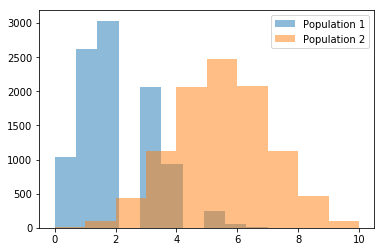

In [4]:
# Histograms for pop 1 and pop 2. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

In [5]:
# Get samples from each population
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

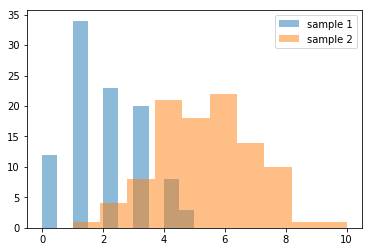

In [7]:
# Histograms for sample1 of pop1 and sample2 of pop2
plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [ ]:
# T-test: the long way around

In [9]:
# mean = n * p
# mean = number of repetitions (n) * probability of an event occurring (p)
# p for each sample =  divide by n (was set to 10 when generating the populations)
# p = mean / n

In [13]:
# get mean and standard deviation
print("Sample 1 mean: ", sample1.mean())
print("Sample 2 mean: ", sample2.mean())
print("Sample 1 std: ", sample1.std())
print("Sample 2 std: ", sample2.std())

Sample 1 mean:  1.87
Sample 2 mean:  5.36
Sample 1 std:  1.2621806526801145
Sample 2 std:  1.7350504315437059


In [64]:
# Compute the difference between the two sample means.
# look at the size of the difference in means in the context of the combined variance of the two samples.
diff=sample2.mean() -sample1.mean()
print("Sample 2 mean - Sample 1 mean: ", diff)

Sample 2 mean - Sample 1 mean:  3.49


In [16]:
# Calculate standard error of sampling distribution of the difference of the means

# 1. create an array with the size of each variable
size = np.array([len(sample1), len(sample2)])

# 2. create an array with standard deviation of each variable
sd = np.array([sample1.std(), sample2.std()])

In [21]:
# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum.
# square root(squared standard deviation sample 1 / sample size) + (squared standard deviation sample 2 / sample size))
diff_standard_error = (sum(sd ** 2 / size)) ** 0.5
print("The difference in standard error between sample1 and sample2: ", diff_standard_error)

The difference in standard error between sample1 and sample2:  0.21455768455126464


In [22]:
#Get the T-value: sample2 mean - sample1 mean / standard error 
print("T value: ", diff/diff_standard_error)

T value:  16.266021919928615


In [ ]:
# T-test: the short way around:
#make sure that I'm not mixing apples/oranges with how it's calculated depending on package
#pandas t test, vs. scipy t test, vs manually doing the t-test

In [24]:
# Get the T-value using scipy = from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=16.184487462029875, pvalue=5.2526362537802855e-37)


In [109]:
# Interpret T-value:
# t-value is the number of standard errors worth of space separating the group means
# A t-value of 2 would indicate that the means are two standard errors apart.
# QUESTION: what's my reference point for 2 - how do I interpret 2 in the context of the problem?
# depends on the context: if it's +/- 1 and you're talking about a person's life years that might be good
# but if you're +/- 20 in a person's life years, might not be so good
# but in context of evolution +/- 20 yrs is nothing

In [26]:
# Interpret p-values:
# indicates the likelihood of getting a difference this large or larger in the samples
# if the populations were not different

# Smaller p-values: confidence = more likely the difference seen in the samples meaningfully reflects the populations.

# Project

In [ ]:
# mypop1: n = 10, size = 10000, p-value = .2
# mypop1: n = 10, size = 10000, p-value = .5

In [27]:
#Define the populations
mypop1 = np.random.binomial(10, 0.2, 10000)
mypop2 = np.random.binomial(10,0.5, 10000)

In [28]:
# Get samples from each population
sample_mypop1 = np.random.choice(mypop1, 100, replace=True)
sample_mypop2 = np.random.choice(mypop2, 100, replace=True)

In [30]:
# get mean and standard deviation
print("Sample mypop1 mean: ", sample_mypop1.mean())
print("Sample mypop2 mean: ", sample_mypop2.mean())
print("Sample mypop1 std: ", sample_mypop1.std())
print("Sample mypop2 std: ", sample_mypop2.std())

Sample mypop1 mean:  2.11
Sample mypop2 mean:  5.29
Sample mypop1 std:  1.2238872497088937
Sample mypop2 std:  1.7736685146892583


# Question 1

## 1.1 Increase the samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each.

In [38]:
sample1000_mypop1 = np.random.choice(mypop1, 1000, replace=True)
sample1000_mypop2 = np.random.choice(mypop2, 1000, replace=True)

In [39]:
# get mean and standard deviation
print("Q1: Sample mypop1 mean: ", sample1000_mypop1.mean())
print("Q1: Sample mypop2 mean: ", sample1000_mypop2.mean())
print("Q1: Sample mypop1 std:  ", sample1000_mypop1.std())
print("Q1: Sample mypop2 std:  ", sample1000_mypop2.std())

Q1: Sample mypop1 mean:  1.926
Q1: Sample mypop2 mean:  4.978
Q1: Sample mypop1 std:   1.2468055181141924
Q1: Sample mypop2 std:   1.556122103178282


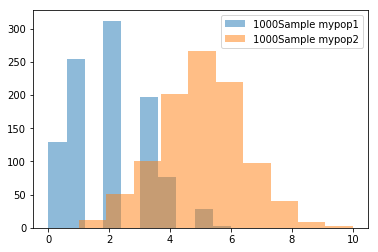

In [43]:
# Histograms for sample1 of pop1 and sample2 of pop2
plt.hist(sample1000_mypop1, alpha=0.5, label='1000Sample mypop1')
plt.hist(sample1000_mypop2, alpha=0.5, label='1000Sample mypop2')
plt.legend(loc='upper right')
plt.show()

## 1.2 Decrease sample size to 20 and repeat

In [41]:
sample20_mypop1 = np.random.choice(mypop1, 1000, replace=True)
sample20_mypop2 = np.random.choice(mypop2, 1000, replace=True)

In [45]:
# get mean and standard deviation
print("Q1: 20Sample mypop1 mean: ", sample20_mypop1.mean())
print("Q1: 20Sample mypop2 mean: ", sample20_mypop2.mean())
print("Q1: 20Sample mypop1 std:  ", sample20_mypop1.std())
print("Q1: 20Sample mypop2 std:  ", sample20_mypop2.std())

Q1: 20Sample mypop1 mean:  1.999
Q1: 20Sample mypop2 mean:  5.019
Q1: 20Sample mypop1 std:   1.2565822694913373
Q1: 20Sample mypop2 std:   1.5487540153297426


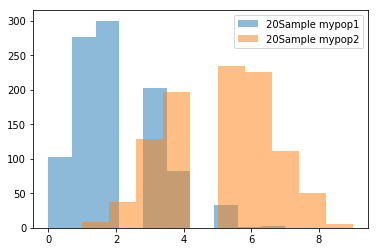

In [44]:
# plot histograms of samples of populations
plt.hist(sample20_mypop1, alpha=0.5, label='20Sample mypop1')
plt.hist(sample20_mypop2, alpha=0.5, label='20Sample mypop2')
plt.legend(loc="upper right")
plt.show()

## 1.3 What values change and what values stay the same?

In [108]:
# mean and standard deviation
diff_between_samplesize_means_pop1 = sample20_mypop1.mean() - sample1000_mypop1.mean()
print("Q1: 20Sample mypop1 mean:       ", sample20_mypop1.mean())
print("Q1: 1000Sample mypop1 mean:     ", sample1000_mypop1.mean())
print('Difference between sample means:', diff_between_samplesize_means_pop1)

Q1: 20Sample mypop1 mean:        1.999
Q1: 1000Sample mypop1 mean:      1.926
Difference between sample means: 0.07300000000000018


In [107]:
diff_between_samplesize_means_pop2 = sample20_mypop2.mean() - sample1000_mypop2.mean()
print("Q1: 20Sample mypop2 mean:       ", sample20_mypop2.mean())
print("Q1: 1000Sample mypop2 mean:     ", sample1000_mypop2.mean())
print('Difference between sample means:', diff_between_samplesize_means_pop2)

Q1: 20Sample mypop2 mean:        5.019
Q1: 1000Sample mypop2 mean:      4.978
Difference between sample means: 0.04100000000000037


In [105]:
diff_between_samplesize_std_pop1 = sample1000_mypop2.std() - sample20_mypop2.std()
print("Q1: 20Sample mypop1 std:      ", sample20_mypop1.std())
print("Q1: 1000Sample mypop1 std:    ", sample1000_mypop1.std())

print('Difference between sample std:', diff_between_samplesize_std_pop1)

Q1: 20Sample mypop1 std:       1.2565822694913373
Q1: 1000Sample mypop1 std:     1.2468055181141924
Difference between sample std: 0.007368087848539373


In [106]:
diff_between_samplesize_std_pop2 = sample1000_mypop2.std() - sample20_mypop2.std()

print("Q1: 20Sample mypop2 std:      ", sample20_mypop2.std())
print("Q1: 1000Sample mypop2 std:    ", sample1000_mypop2.std())

print('Difference between sample std:', diff_between_samplesize_std_pop2)

Q1: 20Sample mypop2 std:       1.5487540153297426
Q1: 1000Sample mypop2 std:     1.556122103178282
Difference between sample std: 0.007368087848539373


QUESTION: Doesn't make sense to me how to evaluate here...given the answer in the solution set
There's not a whole lot of shift in mean, but more shift standard deviation between population sample sizes.

In [79]:
#QUESTION: huh?
print(ttest_ind(sample20_mypop2, sample20_mypop1, equal_var=False))

Ttest_indResult(statistic=47.860481011532514, pvalue=0.0)


# Question 2

## 2.1 Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value.

In [93]:
#Define the populations
pchange1_mypop1 = np.random.binomial(10, 0.3, 10000)
pchange1_mypop2 = np.random.binomial(10, 0.5, 10000)

In [94]:
# Get the samples
sample1_pchange1_mypop1 = np.random.choice(pchange1_mypop1, 100, replace=True)
sample1_pchange1_mypop2 = np.random.choice(pchange1_mypop2, 100, replace=True)

In [95]:
print(ttest_ind(sample1_pchange1_mypop2, sample1_pchange1_mypop1, equal_var=False))

Ttest_indResult(statistic=10.031829044843336, pvalue=2.7192060004914936e-19)


## 2.2 Then change the probability value p for group 1 to 0.4, and do it again.

In [96]:
#Define the populations
pchange2_mypop1 = np.random.binomial(10, 0.4, 10000)
pchange2_mypop2 = np.random.binomial(10, 0.5, 10000)

In [97]:
# Get the samples
sample2_pchange2_mypop1 = np.random.choice(pchange2_mypop1, 100, replace=True)
sample2_pchange2_mypop2 = np.random.choice(pchange2_mypop2, 100, replace=True)

In [98]:
# T-Test
print(ttest_ind(sample2_pchange2_mypop2, sample2_pchange2_mypop1, equal_var=False))

Ttest_indResult(statistic=7.795869351609765, pvalue=3.5753783763721487e-13)


## 2.3 What changes, and why?

The t-value shrinks and the p-value increases as the samples get closer to each other.

# Question 3

##  3.1 Change the distribution of populations from binomial to a distribution of your choice

In [102]:
# Define the populations
gamma_mypop1 = np.random.gamma(10, 0.4, 10000)
gamma_mypop2 = np.random.gamma(10, 0.5, 10000)

In [103]:
# Get sample populations
sample_gamma_mypop1 = np.random.choice(gamma_mypop1, 100, replace=True)
sample_gamma_mypop2 = np.random.choice(gamma_mypop2, 100, replace=True)

In [104]:
# T test - is there a significant difference in the sample population means?
print(ttest_ind(sample_gamma_mypop1, sample_gamma_mypop2, equal_var=False))

Ttest_indResult(statistic=-4.923675662654489, pvalue=1.8782422076877378e-06)


## 3.2 Do the sample mean values still accurately represent the population values?

Central limit theory says that the any sample population of non-normal distribution will have a normal distribution.